In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load and Split Data
# Load Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target



In [3]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [4]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
# Display dataset information
print("Dataset Features:", diabetes.feature_names)
print("Dataset Shape:", X.shape)
print("\nFirst few rows of features:")
print(pd.DataFrame(X, columns=diabetes.feature_names).head())


Dataset Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Dataset Shape: (442, 10)

First few rows of features:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Simple Linear Regression - Model Training
# Use only one feature (BMI) for simple linear regression
X_simple = X_train[:, 2:3]  # Using the BMI feature
X_test_simple = X_test[:, 2:3]



In [10]:
# Fit the simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_simple, y_train)


LinearRegression()

In [11]:
# Make predictions
y_pred_simple = simple_model.predict(X_test_simple)


In [12]:
# Simple Linear Regression - Evaluation
# Calculate performance metrics
r2_simple = r2_score(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)

print("\nSimple Linear Regression Results:")
print(f"Coefficient: {simple_model.coef_[0]:.2f}")
print(f"Intercept: {simple_model.intercept_:.2f}")
print(f"R-squared: {r2_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")



Simple Linear Regression Results:
Coefficient: 998.58
Intercept: 152.00
R-squared: 0.23
MSE: 4061.83


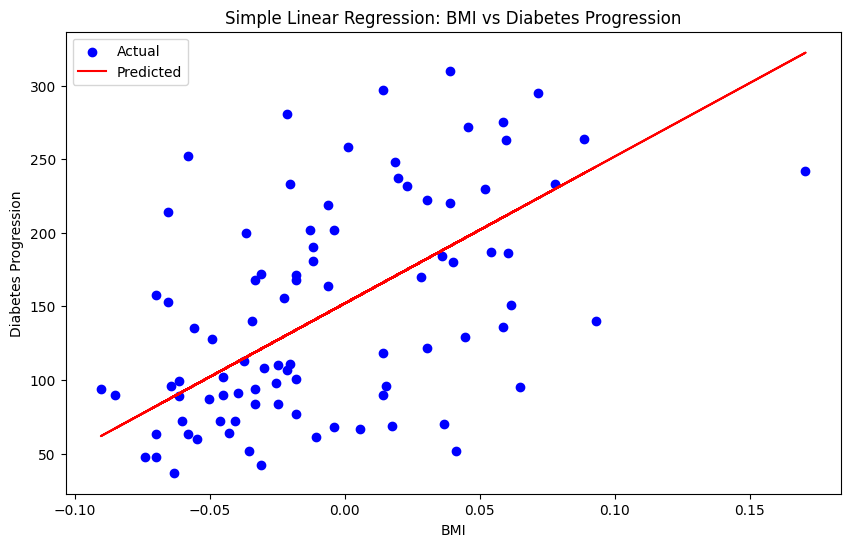

In [13]:
# Simple Linear Regression - Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Simple Linear Regression: BMI vs Diabetes Progression')
plt.legend()
plt.show()


In [14]:
#  Multiple Linear Regression - Model Training
# Fit the multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Make predictions
y_pred_multi = multi_model.predict(X_test)


In [15]:
#  Multiple Linear Regression - Evaluation
# Calculate performance metrics
r2_multi = r2_score(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)

print("\nMultiple Linear Regression Results:")
print("Coefficients:")
for name, coef in zip(diabetes.feature_names, multi_model.coef_):
    print(f"{name}: {coef:.2f}")
print(f"Intercept: {multi_model.intercept_:.2f}")
print(f"R-squared: {r2_multi:.2f}")
print(f"MSE: {mse_multi:.2f}")



Multiple Linear Regression Results:
Coefficients:
age: 37.90
sex: -241.96
bmi: 542.43
bp: 347.70
s1: -931.49
s2: 518.06
s3: 163.42
s4: 275.32
s5: 736.20
s6: 48.67
Intercept: 151.35
R-squared: 0.45
MSE: 2900.19


In [16]:
#  Feature Selection using Lasso
# Fit Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Print feature importance
print("\nFeature Importance (Lasso):")
feature_importance = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Coefficient': lasso.coef_
})
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))




Feature Importance (Lasso):
  Feature  Coefficient
8      s5   566.815003
2     bmi   551.303242
4      s1  -483.567140
3      bp   341.313469
1     sex  -231.906664
7      s4   216.875803
5      s2   165.990532
9      s6    49.702475
0     age    35.347451
6      s3   -25.834899


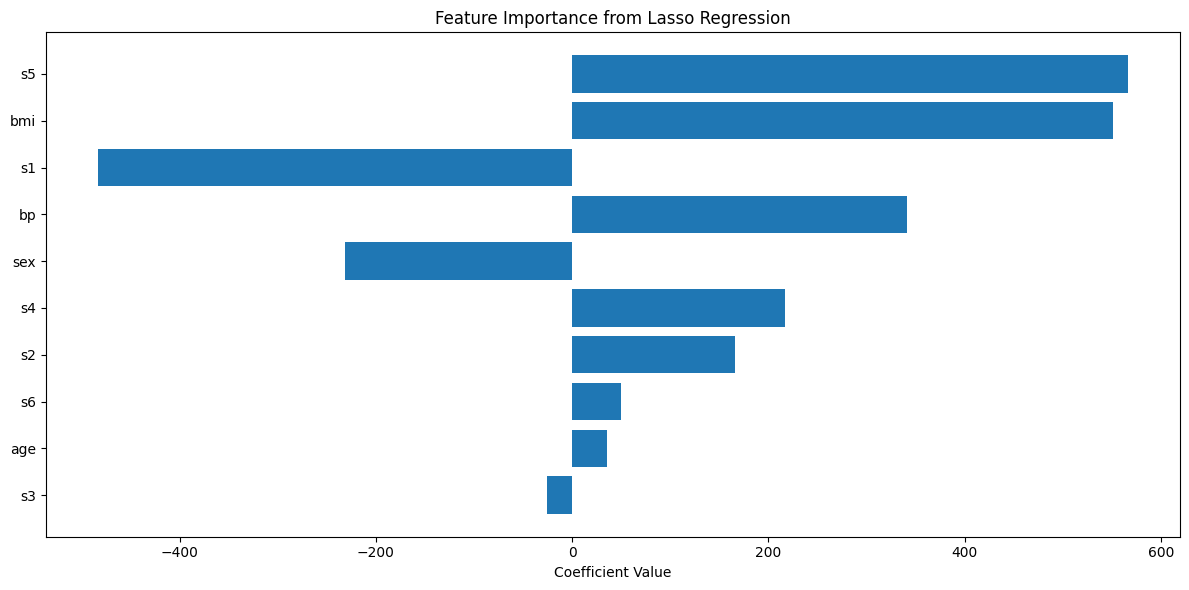

In [17]:
#  Visualization of Feature Importance
plt.figure(figsize=(12, 6))
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs)
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.title('Feature Importance from Lasso Regression')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()




Model Comparison:
                        Model  R-squared          MSE
0    Simple Linear Regression   0.233350  4061.825928
1  Multiple Linear Regression   0.452603  2900.193628


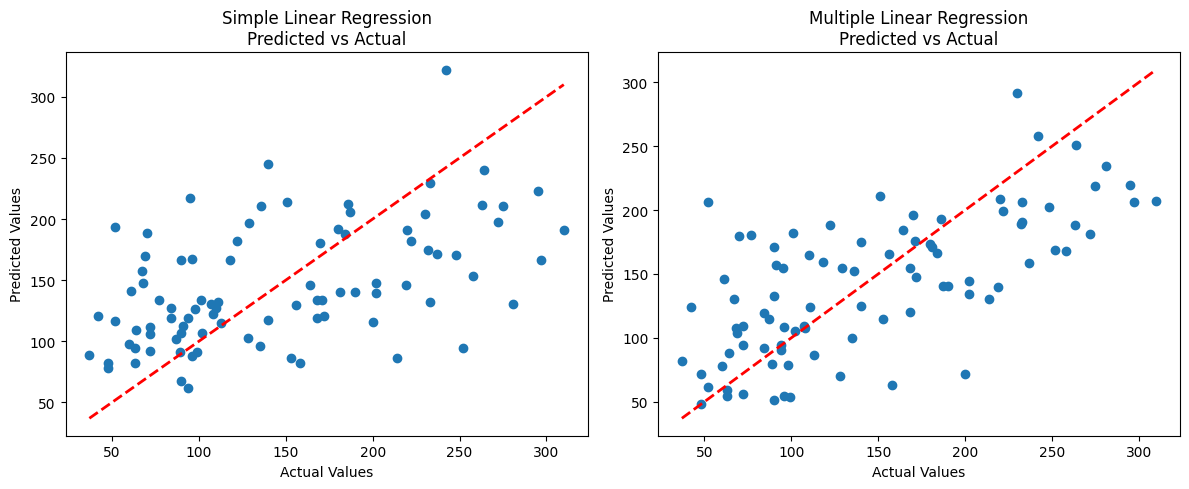

In [18]:
# Model Comparison
comparison_df = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression'],
    'R-squared': [r2_simple, r2_multi],
    'MSE': [mse_simple, mse_multi]
})
print("\nModel Comparison:")
print(comparison_df)

# Visualize predictions vs actual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_simple)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Simple Linear Regression\nPredicted vs Actual')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_multi)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression\nPredicted vs Actual')

plt.tight_layout()
plt.show()